In [1]:
# coco - # Convert [x_min, y_min, width, height] to [left, top, right, bottom]

In [18]:
## iou 계산하는 함수 -> iou값 반환
def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes using [x_min, y_min, width, height] format."""
    
    # Convert [x_min, y_min, width, height] to [left, top, right, bottom]
    left1, top1, right1, bottom1 = box1[0], box1[1], box1[2] + box1[0], box1[1] + box1[3]
    left2, top2, right2, bottom2 = box2
    print("label",left1, top1, right1, bottom1)
    print("pred",left2, top2, right2, bottom2)
    print()
    # Determine the coordinates of the intersection rectangle
    x_left = max(left1, left2)
    y_top = max(top1, top2)
    x_right = min(right1, right2)
    y_bottom = min(bottom1, bottom2)

    # Calculate the area of intersection rectangle
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Calculate the area of both bounding boxes
    box1_area = (right1 - left1) * (bottom1 - top1)
    box2_area = (right2 - left2) * (bottom2 - top2)

    # Compute the union area by using the formula:
    # Union(A,B) = A + B - Inter(A,B)
    union_area = box1_area + box2_area - intersection_area

    # Compute the IoU by dividing the intersection area by the union area
    iou = intersection_area / union_area
    return iou

## 가장 높은 iou값 찾는 함수 -> iou값이 가장 높은 박스 인덱스 반환, 가장 높은 iou값 반환
def find_highest_iou(label_box, pred_boxes):
    # print("----------------------")
    highest_iou_idx = 0 
    highest_iou = 0
    
    for idx, pred_box in enumerate(pred_boxes):
        new_iou = calculate_iou(label_box, pred_box)
        if new_iou > highest_iou:
            highest_iou = new_iou
            highest_iou_idx = idx
    print("highest_iou:", highest_iou)
    print("----------------------")
    return highest_iou_idx, highest_iou
        

In [19]:
## 예측값 json 가져오기 
import json

# JSON 파일을 읽고 데이터를 파이썬 객체로 변환
with open('results_for_eval(3).json', 'r', encoding='utf-8') as file: # evaluation_pipeline.py 에서 지정한 파일 명과 동일한지 확인하기
    pred = json.load(file)
# pred

In [20]:
pred.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

In [21]:
len(pred) # evaluation_pipeline.py의 video path에 넣어준 비디오 개수와 일치

20

In [22]:
##  label json 가져오기

from pycocotools.coco import COCO
annotation_path = '/home/20201320/soobin/capstone-2024-04/src/model/pipeline/par_look_dataset/_annotations.coco.json'
label = COCO(annotation_path)
label.anns

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


{0: {'id': 0,
  'image_id': 0,
  'category_id': 2,
  'bbox': [740, 187, 395, 838],
  'area': 331010,
  'segmentation': [],
  'iscrowd': 0},
 1: {'id': 1,
  'image_id': 1,
  'category_id': 2,
  'bbox': [775, 189, 354, 830],
  'area': 293820,
  'segmentation': [],
  'iscrowd': 0},
 2: {'id': 2,
  'image_id': 1,
  'category_id': 4,
  'bbox': [1018, 155, 448.5, 925],
  'area': 414862.5,
  'segmentation': [],
  'iscrowd': 0},
 3: {'id': 3,
  'image_id': 2,
  'category_id': 3,
  'bbox': [690, 10, 441, 1044.5],
  'area': 460624.5,
  'segmentation': [],
  'iscrowd': 0},
 4: {'id': 4,
  'image_id': 2,
  'category_id': 3,
  'bbox': [1372, 254, 548, 826],
  'area': 452648,
  'segmentation': [],
  'iscrowd': 0},
 5: {'id': 5,
  'image_id': 3,
  'category_id': 4,
  'bbox': [846, 65, 400, 896],
  'area': 358400,
  'segmentation': [],
  'iscrowd': 0},
 6: {'id': 6,
  'image_id': 3,
  'category_id': 3,
  'bbox': [1475, 143, 357, 852],
  'area': 304164,
  'segmentation': [],
  'iscrowd': 0},
 7: {'id':

In [23]:
## label과 pred의 frame_id align을 위한 preprocessing

frame_changer = {}
for k in label.anns.keys():
    image_id = label.anns[k]['image_id']
    video_str, frame_str, _ = label.loadImgs(image_id)[0]['file_name'].split('_')
    if video_str not in frame_changer.keys():
        frame_changer[video_str] = []
    frame_changer[video_str].append(frame_str)

for k, v in frame_changer.items():
    frame_changer[k] = sorted(list(set(v)))
frame_changer

{'video5': ['mp4-0000',
  'mp4-0001',
  'mp4-0002',
  'mp4-0003',
  'mp4-0004',
  'mp4-0005',
  'mp4-0006',
  'mp4-0007',
  'mp4-0008',
  'mp4-0009',
  'mp4-0010',
  'mp4-0011',
  'mp4-0012',
  'mp4-0013',
  'mp4-0014',
  'mp4-0015',
  'mp4-0016',
  'mp4-0017',
  'mp4-0018',
  'mp4-0019',
  'mp4-0020',
  'mp4-0021',
  'mp4-0022',
  'mp4-0023',
  'mp4-0024',
  'mp4-0025',
  'mp4-0026',
  'mp4-0027',
  'mp4-0028',
  'mp4-0029',
  'mp4-0030',
  'mp4-0031',
  'mp4-0032',
  'mp4-0033',
  'mp4-0034',
  'mp4-0035',
  'mp4-0036',
  'mp4-0037',
  'mp4-0038',
  'mp4-0039',
  'mp4-0040',
  'mp4-0041',
  'mp4-0042',
  'mp4-0043'],
 'video20': ['mp4-0000',
  'mp4-0001',
  'mp4-0002',
  'mp4-0003',
  'mp4-0004',
  'mp4-0005',
  'mp4-0006',
  'mp4-0007',
  'mp4-0008',
  'mp4-0009',
  'mp4-0010',
  'mp4-0011',
  'mp4-0012',
  'mp4-0013',
  'mp4-0014',
  'mp4-0015',
  'mp4-0016',
  'mp4-0017',
  'mp4-0018',
  'mp4-0019',
  'mp4-0020',
  'mp4-0021',
  'mp4-0022',
  'mp4-0023',
  'mp4-0024',
  'mp4-0025'

In [24]:
label.loadImgs(14)

[{'id': 14,
  'license': 1,
  'file_name': 'video30_mp4-0048_jpg.rf.fe46d2541136e7c834f51e8ad9cd614c.jpg',
  'height': 1080,
  'width': 1920,
  'date_captured': '2024-05-12T16:02:07+00:00'}]

In [25]:
pred['12']['track'] # 프레임 개수, 각 프레임의 박스 확인

[[[1420.0, 290.0, 1919.0, 1079.0, 1.0, 0.9426057934761047, 0.0]],
 [[1420.0, 268.0, 1857.0, 1078.0, 1.0, 0.9210208058357239, 0.0]],
 [[1232.0, 258.0, 1733.0, 1078.0, 1.0, 0.9070137143135071, 0.0]],
 [[1205.0, 253.0, 1609.0, 1078.0, 1.0, 0.9038700461387634, 0.0]],
 [[1550.0, 203.0, 1920.0, 1077.0, 2.0, 0.7678260207176208, 0.0],
  [1079.0, 243.0, 1455.0, 1078.0, 1.0, 0.8906159996986389, 0.0]],
 [[1478.0, 183.0, 1920.0, 1079.0, 2.0, 0.9228290319442749, 0.0],
  [827.0, 244.0, 1323.0, 1078.0, 1.0, 0.900494396686554, 0.0]],
 [[1217.0, 179.0, 1826.0, 1074.0, 2.0, 0.9241696000099182, 0.0],
  [819.0, 226.0, 1095.0, 1070.0, 1.0, 0.8565060496330261, 0.0]],
 [[1203.0, 141.0, 1725.0, 1080.0, 2.0, 0.9070548415184021, 0.0],
  [694.0, 214.0, 964.0, 1080.0, 1.0, 0.8867093324661255, 0.0]],
 [[1121.0, 118.0, 1563.0, 1071.0, 2.0, 0.9081231951713562, 0.0],
  [467.0, 247.0, 940.0, 1074.0, 1.0, 0.8955925703048706, 0.0]],
 [[966.0, 140.0, 1421.0, 1074.0, 2.0, 0.8918516635894775, 0.0],
  [335.0, 252.0, 798.0, 

In [26]:
label.loadImgs(image_id)[0]['file_name']
file_name = label.loadImgs(image_id)[0]['file_name']
file_name_list = file_name.split('_')
video_id = file_name_list[0][5:]
frame_id = int(file_name_list[1][-4:])
frame_id

44

In [27]:
def label_frame_id_to_pred_frame_id(search_string, frame_str):
    for i, f_s in enumerate(frame_changer[search_string]):
        if frame_str == f_s:
            return i
    
    return False

In [28]:
## label object별로 for문

age_label_list = []
gender_label_list = []
stare_label_list = []

age_pred_list = []
gender_pred_list = []
stare_pred_list = []

sum_highest_iou = 0

# label을 for문 돌면서 videoid와 frameid를 획득 -> videoid와 frameid로 pred의 정보획득
for label_objects in label.anns.values():   
    print("label_objects : ", label_objects)
    image_id = label_objects['image_id'] # 
    file_name = label.loadImgs(image_id)[0]['file_name']
    file_name_list = file_name.split('_')
    video_id = file_name_list[0][5:]
    label_frame_id = int(file_name_list[1][-4:]) # 라벨이 띄엄띄엄 있음 -> pred처럼 바꿔줘야함
    pred_frame_id = label_frame_id_to_pred_frame_id(file_name_list[0], file_name_list[1])
    frame_id = pred_frame_id
    
    if video_id not in pred.keys():
        print("video_id is not in pred.keys()")
        continue
        # print("annotation부족")
        # assert False
        
    # label 전처리
    label_str = label.cats[label_objects['category_id']]['name']
    gender_str, stare_str = label_str.split('_')
    bboxes_label = label_objects['bbox']
    
    # label값 list에 저장
    if 'female' in gender_str:
        gender_label_list.append(0)
    else:
        gender_label_list.append(1)
        
    # if '10' in age_str:
    #     age_label_list.append(0)
    # elif '20' in age_str:
    #     age_label_list.append(1)
    # elif '30' in age_str:
    #     age_label_list.append(2)
    # elif '40' in age_str:
    #     age_label_list.append(3)
    # else:
    #     assert False
    
    age_label_list.append(1) # 전부 20대라 age_label_list를 1로 채움
    
    if 'not' in stare_str:
        stare_label_list.append(0)
    else:
        stare_label_list.append(1)
    
    # label frame의 오브젝트의 bbox추출
    print("video id", video_id)
    print("frame id", frame_id)
    print("---------")
    bboxes_preds = [[left, top, right, bottom] for left, top, right, bottom, _, _, _ in pred[video_id]['track'][frame_id]]

    # highest_iou_idx & highest_iou 추출 
    highest_iou_idx, highest_iou = find_highest_iou(bboxes_label, bboxes_preds)
    sum_highest_iou += highest_iou
    
    # label object에 대응하는 pred값 추출 
    # age_pred_str, gender_pred_str, stare_pred_percent = None, None, None
    if highest_iou > 0.5: ###### iou threshold 지정
        ReID를위한건데안씀, age_pred_str, gender_pred_str =  pred[video_id]['par'][str(frame_id)][highest_iou_idx]
        ReID를위한건데안씀, stare_pred_percent_str = pred[video_id]['look'][str(frame_id)][highest_iou_idx]
        # print(age_pred_str, gender_pred_str, stare_pred_percent)
    else:
        gender_pred_list.append(None)
        age_pred_list.append(None)
        stare_pred_list.append(None)
        continue

    
    # gender_pred_list 구성
    gender_pred_list.append(1 if gender_pred_str == 'male' else 0)

    # age_pred_list 구성
    for i, age_range in enumerate(['young', 'teenager', 'adult', 'old']):
        if age_range == age_pred_str:
            age_pred_list.append(i)        

    # stare_pred_list 구성
    stare_pred_list.append(1 if float(stare_pred_percent_str) > 0.4  else 0)
    
    # print(bbox_preds)
    # print(label_objects)

label_objects :  {'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [740, 187, 395, 838], 'area': 331010, 'segmentation': [], 'iscrowd': 0}
video id 5
frame id 29
---------
label 740 187 1135 1025
pred 790.0 192.0 1122.0 1024.0

label 740 187 1135 1025
pred 251.0 194.0 708.0 1075.0

highest_iou: 0.8344883840367361
----------------------
label_objects :  {'id': 1, 'image_id': 1, 'category_id': 2, 'bbox': [775, 189, 354, 830], 'area': 293820, 'segmentation': [], 'iscrowd': 0}
video id 5
frame id 17
---------
label 775 189 1129 1019
pred 1002.0 156.0 1462.0 1074.0

label 775 189 1129 1019
pred 791.0 189.0 1101.0 1029.0

highest_iou: 0.8665633840765189
----------------------
label_objects :  {'id': 2, 'image_id': 1, 'category_id': 4, 'bbox': [1018, 155, 448.5, 925], 'area': 414862.5, 'segmentation': [], 'iscrowd': 0}
video id 5
frame id 17
---------
label 1018 155 1466.5 1080
pred 1002.0 156.0 1462.0 1074.0

label 1018 155 1466.5 1080
pred 791.0 189.0 1101.0 1029.0

highest_iou: 0.94888028

In [16]:
len(gender_label_list)

1126

In [17]:
len(gender_pred_list)

1126

In [30]:
## 정확도 확인

gender_acc = 0
age_acc = 0
stare_acc = 0
for i in range(len(gender_pred_list)): # 원래 label_list였음
	if gender_label_list[i] == gender_pred_list[i]:
		gender_acc += 1
	if age_label_list[i] == age_pred_list[i]:
		age_acc += 1
	if stare_label_list[i] == stare_pred_list[i]:
		stare_acc += 1
gender_acc /= len(gender_pred_list)
age_acc /= len(gender_pred_list)
stare_acc /= len(gender_pred_list)
print("gender_acc : ", gender_acc)
print("age_acc : ", age_acc)
print("stare_acc : ", stare_acc)

gender_acc :  0.4289520426287744
age_acc :  0.9849023090586145
stare_acc :  0.6083481349911191


In [31]:
## highest_iou 평균 확인
sum_highest_iou/len(age_pred_list)

0.8548339729239814

In [32]:
len(age_pred_list)

1126

In [65]:
## 시각화를 위해서 video, frame, label id 추출

video_number = '4' ############# 직접 입력

for label_id in range(3000):
    image_id = label.anns[label_id]['image_id'] # 
    file_name = label.loadImgs(image_id)[0]['file_name']
    file_name_list = file_name.split('_')
    video_id = file_name_list[0][5:]
    label_frame_id = int(file_name_list[1][-4:]) # 띄엄띄엄 있음 -> pred처럼 바꿔줘야함
    pred_frame_id = label_frame_id_to_pred_frame_id(file_name_list[0], file_name_list[1])
    frame_id = pred_frame_id
    if video_id == video_number:
        print("video_id/", video_id, "frame_id/", frame_id, "label_id/", label_id, "file_name/", file_name)
        
# 아래 print문에서 확인하고 싶은 video id, frame id, label id 선택해서 아래에 입력 (코드가 좀 웃김)
# 해당 셀을 실행한 후에, 바로 아래 셀을 실행하면 지정한 video id, frame id, label id의 시각화 결과를 볼 수 있음
video_id = 4 # 직접 입력
frame_id = 5 # 직접 입력
label_id = 365 # 직접 입력
file_name = "video4_mp4-0005_jpg.rf.1bdd9a749f19087cf18f8ff9ba6cca9f.jpg" # 직접 입력 - string

video_id/ 4 frame_id/ 5 label_id/ 365 file_name/ video4_mp4-0005_jpg.rf.1bdd9a749f19087cf18f8ff9ba6cca9f.jpg
video_id/ 4 frame_id/ 5 label_id/ 366 file_name/ video4_mp4-0005_jpg.rf.1bdd9a749f19087cf18f8ff9ba6cca9f.jpg
video_id/ 4 frame_id/ 14 label_id/ 374 file_name/ video4_mp4-0014_jpg.rf.1c73ffad53a91cf9da2d2acd5bc34481.jpg
video_id/ 4 frame_id/ 14 label_id/ 375 file_name/ video4_mp4-0014_jpg.rf.1c73ffad53a91cf9da2d2acd5bc34481.jpg
video_id/ 4 frame_id/ 6 label_id/ 437 file_name/ video4_mp4-0006_jpg.rf.203791a730dd194e8b8be27fa9dc9135.jpg
video_id/ 4 frame_id/ 6 label_id/ 438 file_name/ video4_mp4-0006_jpg.rf.203791a730dd194e8b8be27fa9dc9135.jpg
video_id/ 4 frame_id/ 15 label_id/ 473 file_name/ video4_mp4-0015_jpg.rf.24497e776727625b40465d15cc1551a6.jpg
video_id/ 4 frame_id/ 15 label_id/ 474 file_name/ video4_mp4-0015_jpg.rf.24497e776727625b40465d15cc1551a6.jpg
video_id/ 4 frame_id/ 10 label_id/ 530 file_name/ video4_mp4-0010_jpg.rf.28a6f4e46a43c2e07546ec16bf66d85b.jpg
video_id/ 4 fr

label 1108 193 1416.5 1051.5
pred 1102.0 202.0 1390.0 1046.0

label 1108 193 1416.5 1051.5
pred 1232.0 393.0 1638.0 1076.0

label 1108 193 1416.5 1051.5
pred 661.0 89.0 1047.0 1044.0

highest_iou: 0.8818009623533661
----------------------
video_id: 4 , frame_id: 5 , label_id: 365
label(red) [1108, 193, 308.5, 858.5]
pred(blue) [1102.0, 202.0, 1390.0, 1046.0]


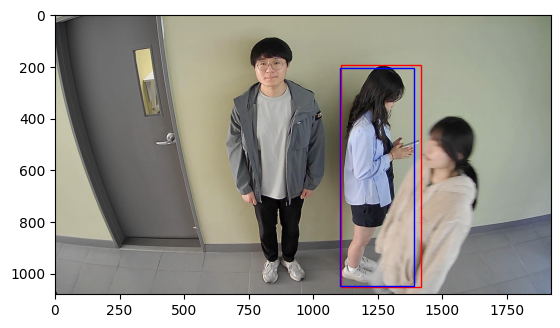

age pred: teenager
gender pred: female
look pred possibility: 0.0014207034


In [72]:
## label과 pred의 추론 결과 시각화

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import os

def draw_bboxes(image_path, bbox1, bbox2):
    # 이미지를 불러옵니다.
    img = mpimg.imread(image_path)
    
    # 이미지를 표시할 준비를 합니다.
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    # 첫 번째 bounding box를 그립니다. - label
    # rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2], bbox1[3], linewidth=1, edgecolor='r', facecolor='none')
    rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2], bbox1[3], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect1)
    
    # 두 번째 bounding box를 그립니다. - pred
    # rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2] - bbox2[0], bbox2[3] - bbox2[1], linewidth=1, edgecolor='b', facecolor='none')
    rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2] - bbox2[0], bbox2[3] - bbox2[1], linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect2)
    
    # 결과를 표시합니다.
    plt.show()

    # [x_min, y_min, width, height] - label / [left, top, right, bottom] - pred


# 이미지 경로와 bounding box 좌표를 설정합니다.

image_path = file_name
bboxes_preds = [[left, top, right, bottom] for left, top, right, bottom, _, _,_ in pred[str(video_id)]['track'][int(frame_id)]]
# highest_iou_idx & highest_iou 추출 
highest_iou_idx, highest_iou = find_highest_iou(label.anns[label_id]['bbox'], bboxes_preds)

# bbox1 = label.anns[label_id]['bbox']
print("video_id:", video_id, ", frame_id:", frame_id, ", label_id:", label_id)
bbox1 = label.anns[label_id]['bbox']
print("label(red)",bbox1)
bbox2 = bboxes_preds[highest_iou_idx]
print("pred(blue)",bbox2)

# 함수를 호출하여 결과를 확인합니다.
draw_bboxes(os.path.join("/home/20201320/soobin/capstone-2024-04/src/model/pipeline/par_look_dataset/", file_name), bbox1, bbox2)

ReID를위한건데안씀, age_pred_str, gender_pred_str =  pred[str(video_id)]['par'][str(frame_id)][highest_iou_idx]
ReID를위한건데안씀, stare_pred_percent_str = pred[str(video_id)]['look'][str(frame_id)][highest_iou_idx]

print("age pred:", age_pred_str)
print("gender pred:", gender_pred_str)
print("look pred possibility:", stare_pred_percent_str)